<a href="https://colab.research.google.com/github/Muhirwakyeyune/Labs_KErnel_Methods/blob/main/Practical_Session_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import matplotlib.pyplot as plt

***
## Part 1

### Kernel function definition
A function $k: \mathcal{X} \times \mathcal{X} \to \mathbb{R}$ is a **positive definite (p.d.) kernel** if and only if

$\forall n$, $\forall a \in \mathbb{R}^n$, $x_i \in \mathcal{X}$,
$$\sum_{i,j = 1}^{n} a_i a_j k(x_i, x_j) \geq 0$$

---

In matrix notation, this condition is:

$\forall n$, $\forall \mathbf{a} \in \mathbb{R}^n$, $x_i \in \mathcal{X}$,
$$\mathbf{a}^\top K \mathbf{a} \geq 0 $$
where $K$ is the $(n, n)$ Gram matrix of $x$: $K_{i,j} = k(x_i, x_j)$

---

It is also equivalent to $K$ being **positive semi-definite** (symmetric and all its eigenvalues are $\geq 0$ )

### Exercise 1

Let $k_1$ and $k_2$ be p.d. kernels.

In each of the following cases, **show that $k$ is a p.d. kernel**

**(a)** $k(x, y) = \gamma k_1(x, y)$ with $\gamma > 0$

**(b)** $k = k_1 + k_2$

**(c)** Let $f$ be a function $f: \mathcal{X} \to \mathbb{R}$:
$$k(x, y) = f(x)\, k_1(x, y)\, f(y)$$


**(d)** Let $(k_m)$ be a series of p.d. kernels such that for every $x$, $y$, $\left(k_m(x, y)\right)_m$ converges. $$k(x, y) = \lim_{m \to +\infty} k_m(x, y)$$

**(e)** $k(x, y) = k_1(x, y) k_2(x, y)$ *This is accepted without proof*

**Corollary of (e)** $k(x, y) = (k_1(x, y))^d $ is pd for all $d \in \mathbb{N}$

**(f)** $k(x, y) = \exp\,\left(k_1(x, y)\right)$

*Hint: Taylor series of $\exp$*

$$k = \exp(k_1) = \sum_{d=0}^{+\infty} \frac{k_1^d}{d!}$$


**(g)** There exists $\Phi: \mathcal{X} \to \mathcal{X}'$ such that $$k(x, y) = \Phi(x)^\top \Phi(y)$$

 *(In fact it is shown in the course that this condition is equivalent to $k$ being p.d.)*

If you can express $k$ as a scalar product, then it is p.d.

### Exercise 2

The Radial Basis Function (RBF) kernel with parameter $\sigma$ is defined as follows:

$$k_\sigma(x, y) = \exp \left( -\frac{\|x-y\|^2}{2 \sigma^2}\right)$$

#### Part (a)
Show that $k_\sigma$ is a p.d. kernel.


*Hint: Expand $\|x-y\|^2 = \|x\|^2 -2x^\top y + \|y\|^2$ and use exercise 1*

### Implementation

Vector with vector:

$$k_\sigma(x, y) = \exp \left( -\frac{\|x-y\|^2}{2 \sigma^2}\right)$$


In [49]:
import numpy as np
import matplotlib.pyplot as plt


In [50]:
def rbf_kernel_element_wise(x, y, sigma=1):
    '''
    returns the RBF (Gaussian) kernel k(x, y)

    Input:
    ------
    x and y are p-dimensional vectors
    '''
    p=np.linalg.norm(x) - 2*x.T*y + np.linalg.norm(y)
    K = np.exp(- np.linalg.norm(p)/(2*sigma))
    return K

Pairwise: return the matrix $\left[k_\sigma(X^1_i, X^2_j)\right]_{i,j}$

*Hint: expand $\|x_1-x_2\|^2$ again!*

In [51]:
def rbf_kernel(X1, X2, sigma=10):
    '''
    Returns the kernel matrix K(X1_i, X2_j): size (n1, n2)

    Input:
    ------
    X1: an (n1, p) matrix
    X2: an (n2, p) matrix
    '''
    # For loop with rbf_kernel_element works but is slow in python
    # Use matrix operations!
    # Compute the pairwise Euclidean distances between X1 and X2


    # Compute the RBF kernel matrix

    K = np.exp(-np.sum((X1[:, None] - X2) ** 2, axis=-1) / (2 * sigma**2))

    return K

#### Test it:

In [52]:
p = 7
X1 = np.random.normal(0,1,(10,p))
X2 = np.zeros((5, p))

rbf_kernel(X1, X2)

array([[0.95828878, 0.95828878, 0.95828878, 0.95828878, 0.95828878],
       [0.94595409, 0.94595409, 0.94595409, 0.94595409, 0.94595409],
       [0.98115775, 0.98115775, 0.98115775, 0.98115775, 0.98115775],
       [0.95158918, 0.95158918, 0.95158918, 0.95158918, 0.95158918],
       [0.98213143, 0.98213143, 0.98213143, 0.98213143, 0.98213143],
       [0.97727544, 0.97727544, 0.97727544, 0.97727544, 0.97727544],
       [0.94919076, 0.94919076, 0.94919076, 0.94919076, 0.94919076],
       [0.97366068, 0.97366068, 0.97366068, 0.97366068, 0.97366068],
       [0.98652576, 0.98652576, 0.98652576, 0.98652576, 0.98652576],
       [0.97292433, 0.97292433, 0.97292433, 0.97292433, 0.97292433]])

In [53]:
# Simulate data
np.random.seed(54321)
p = 2

def generate_Xy(n_samples, p=2, sigma=.2):
    # Half of y is 1s, other half is -1
    y = np.ones(n_samples)
    mid = int(n_samples / 2)
    y[mid:] *= -1

    X = np.random.normal(0, 10*sigma, (n_samples, p))
    X += (1 - y[:, np.newaxis]) / 2 # add 1 when y = -1
    # X of shape (n, p)
    # y vector of length n
    return X, y

# Training data
X_train, y_train = generate_Xy(20, sigma=1.)

# Testing data
X_test, y_test = generate_Xy(1000, sigma=10.)

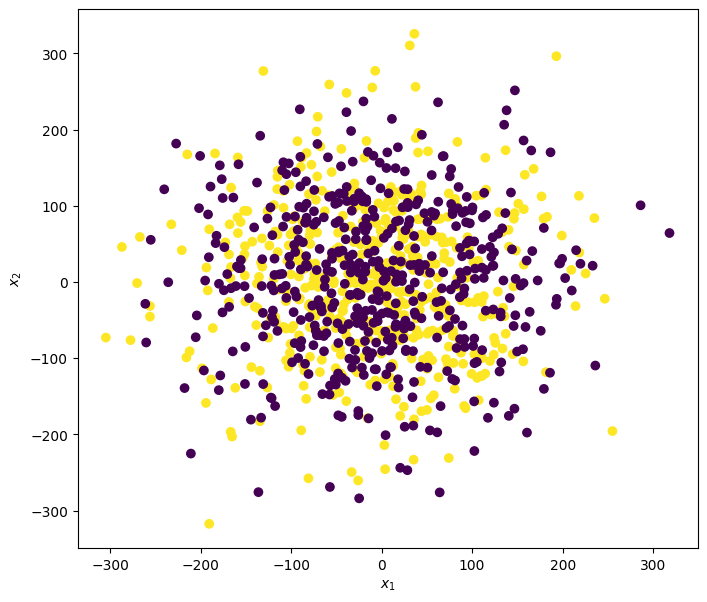

In [54]:
# Visualize data
def plot_data(X, y):
    plt.figure(figsize=(8,7))
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.show()

plot_data(X_test, y_test)

### Choosing $\sigma$
A practical approach of choosing $\sigma$ is called the "median heuristic":
    $$ \sigma \approx \mathrm{median} \left\{\|x_i-x_j\|:i,j=1,\dots, n\right\} \,.$$

Implement this heuristic:

In [55]:
from scipy.spatial.distance import pdist

In [57]:
def sigma_from_median(X):
    '''
    Returns the median of ||Xi-Xj||

    Input
    -----
    X: (n, p) matrix
    '''

    euclidean_distances = pdist(X, metric='euclidean')
    return np.median(euclidean_distances)

print(sigma_from_median(X_train))

14.250219584420606


Plot the matrix $K$ for different values of sigma

Text(0.5, 0, 'Median heuristic')

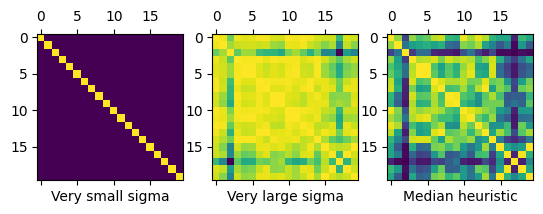

In [58]:

from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
%matplotlib inline

# sigma very small, very large and median heuristic
keyL = ['Very small sigma', 'Very large sigma', 'Median heuristic']
sigL = [1e-6, 1e8, sigma_from_median(X_train)]
KL = [rbf_kernel(X_train, X_train, sigma=sig) for sig in sigL]

# Plot
fig, (ax0, ax1, ax2) = plt.subplots(1,3)
ax0.matshow(KL[0])
ax0.set_xlabel(keyL[0])
ax1.matshow(KL[1])
ax1.set_xlabel(keyL[1])
ax2.matshow(KL[2])
ax2.set_xlabel(keyL[2])

Plot above: kernel matrix K.

Diagonal elements are $k(x_i, x_i) = 1$
    
  - for very small sigma, $k(x_i, x_j) = 0$ if $i \neq j$
  - for very large sigma, $k(x_i, x_j) = 1$ for all $i$ $j$
  
  
If $\sigma$ is too small or too large, the kernel matrix $K$ is uninformative

### Kernel Ridge Regression

Reminder: for regular ridge regression, the prediction rule is
$$\hat{y}(X_t) = X_t \beta \, \,\,\, \text{ with } \beta = X^\top(XX^\top + \lambda n I)^{-1} y $$

Rewriting the prediction rule:
$$\hat{y}(X_t) = X_t X^\top(XX^\top + \lambda n I)^{-1} y$$

We now use the kernel trick to replace the pairwise dot products $XX^\top$ by a kernel matrix:
$$\color{green}{\hat{y}(X_t) = K_{X_t, X} (K_{X, X} + \lambda n I)^{-1} y}$$

**Goal**: Complete the `KernelRidge` class

In [60]:
import numpy as np

class KernelRidge():
    '''
    Kernel Ridge Regression

    Methods
    ----
    fit
    predict
    '''
    def __init__(self, sigma=None, lambd=0.1):
        self.kernel = rbf_kernel
        self.sigma = sigma
        self.lambd = lambd

    def fit(self, X, y):
        n, p = X.shape
        assert (n == len(y))

        self.X_train = X

        # Compute default sigma from data
        if self.sigma is None:
            self.sigma = sigma_from_median(X)

        K = self.kernel(X, X, sigma=self.sigma)
        A =(K + n * self.lambd * np.eye(n))**-1

        ## self.alpha = (K + n lambda I)^-1 y
        # Solution to A x = y
        self.alpha = np.linalg.solve(A, y)

        return self

    def predict(self, X):
        # Prediction rule:
        K_x = self.kernel(X, self.X_train, sigma=self.sigma)
        return np.dot(K_x, self.alpha)


In [43]:
class KernelRidge():
    '''
    Kernel Ridge Regression

    Methods
    ----
    fit
    predict
    '''
    def __init__(self, sigma=None, lambd=0.1):
        self.kernel = rbf_kernel
        self.sigma = sigma
        self.lambd = lambd

    def fit(self, X, y):
        n, p = X.shape
        assert (n == len(y))

        self.X_train = X

        # Compute default sigma from data
        if self.sigma is None:
            self.sigma = sigma_from_median(X)

        A = ...

        ## self.alpha = (K + n lambda I)^-1 y
        # Solution to A x = y
        self.alpha = np.linalg.solve(A , y)

        return self

    def predict(self, X):
        # Prediction rule:
        K_x = self.kernel(X, self.X_train, sigma=self.sigma)
        return ...

In [61]:
model = KernelRidge(lambd=0.1, sigma=None)
y_pred = model.fit(X_train, y_train).predict(X_test)
print(y_pred.shape)

(1000,)


In [38]:
def linear_kernel(X1, X2, **kwargs):
    return X1.dot(X2.T)

#### Reproduce the figures from slide 135

In [62]:
x_train = np.linspace(0, 10, 40)
y_train = np.sin(x_train) + 0.5 * np.random.randn(len(x_train))

x_test = np.linspace(0, 10, 200)